In [1]:
import pandas as pd
import numpy as np

#Dataset#

In [2]:
data = pd.read_csv(r'C:\Users\Acer\Downloads\xAPI-Edu-Data.csv')

In [3]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


#EDA#

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
from scipy.stats import kurtosis, skew


# Fungsi untuk menghitung deskripsi statistik
def descriptive_statistics(data):
    stats = {
        'mean': data.mean(),
        'min': data.min(),
        'max': data.max(),
        'std': data.std(),
        'kurtosis': kurtosis(data, nan_policy='omit'),
        'skew': skew(data, nan_policy='omit')
    }
    return pd.DataFrame(stats)

# Hanya menggunakan kolom numerik untuk analisis
numerical_data = data.select_dtypes(include='number')

# Menghitung statistik
result = descriptive_statistics(numerical_data)

# Menampilkan hasil
print(result)


                        mean  min  max        std  kurtosis      skew
raisedhands        46.775000    0  100  30.779223 -1.493924  0.026877
VisITedResources   54.797917    0   99  33.080007 -1.482252 -0.341370
AnnouncementsView  37.918750    0   98  26.611244 -1.004306  0.397995
Discussion         43.283333    1   99  27.637735 -1.127333  0.361460


In [7]:
# Method 1: Using value_counts() for each column
for column in data.columns:
  print(f"Value counts for column '{column}':\n{data[column].value_counts()}\n")

# Method 2:  Counting rows with specific conditions (example)
# Count the number of students with 'gender' equal to 'M'
male_students_count = data[data['Class'] == 'M'].shape[0]
print(f"\nNumber of male students: {male_students_count}")


# Method 3: Counting total rows in the dataframe
total_rows = len(data)
print(f"\nTotal number of rows in the dataset: {total_rows}")

Value counts for column 'gender':
gender
M    305
F    175
Name: count, dtype: int64

Value counts for column 'NationalITy':
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

Value counts for column 'PlaceofBirth':
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

Value counts for column 'StageID':
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64

Value counts for column 'GradeID':
GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-0

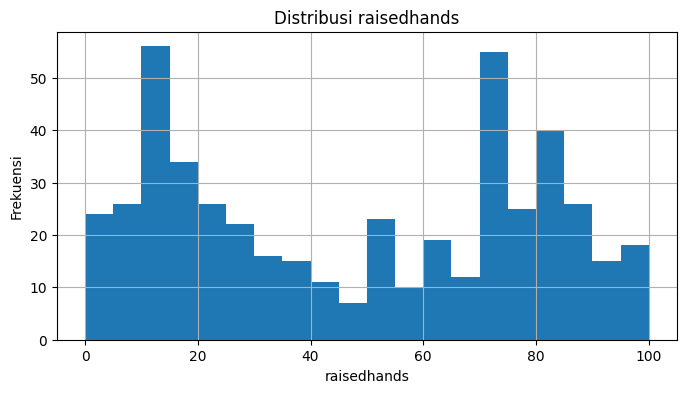

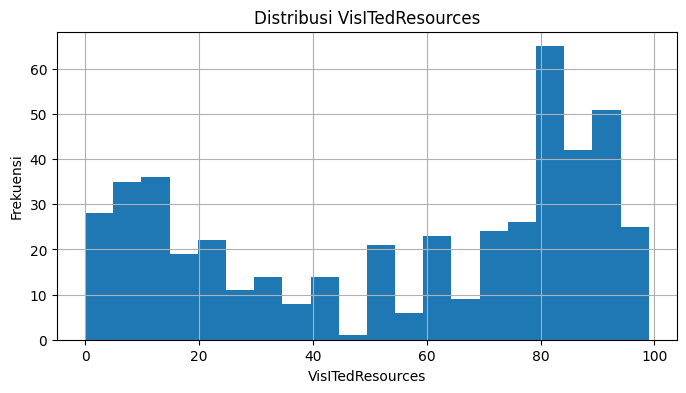

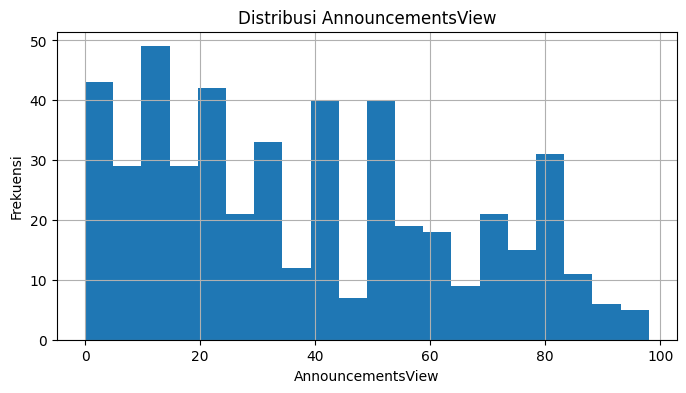

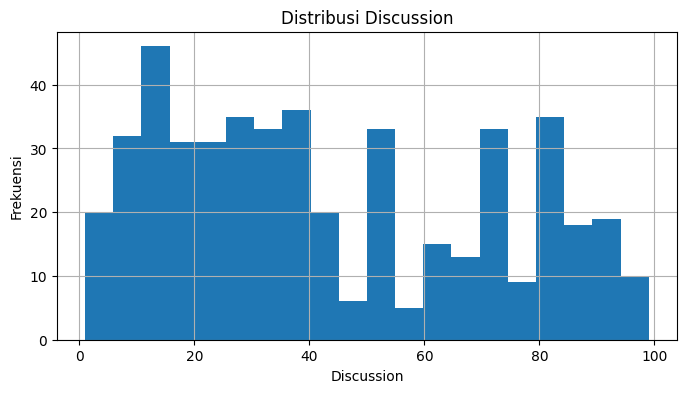

In [8]:
import matplotlib.pyplot as plt

# Mendapatkan kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Visualisasi histogram untuk setiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    data[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {col}')
    plt.show()

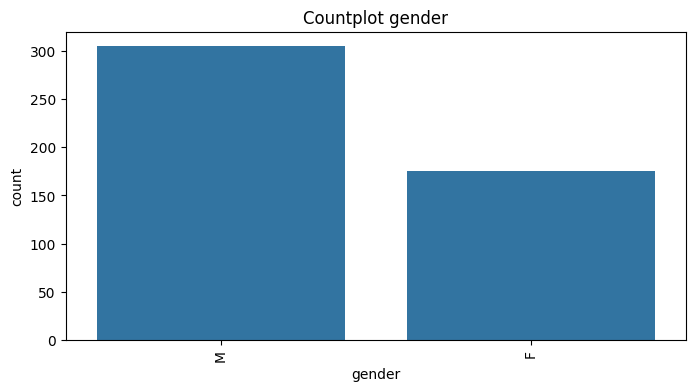

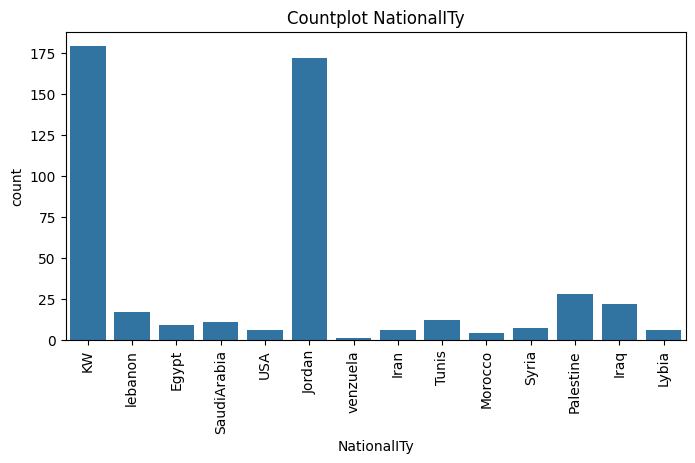

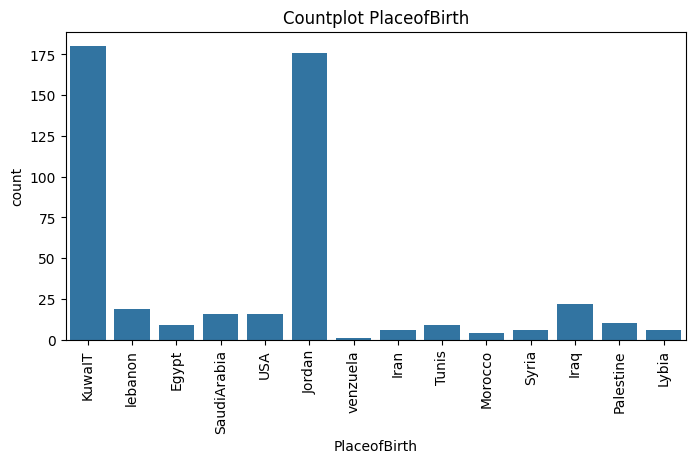

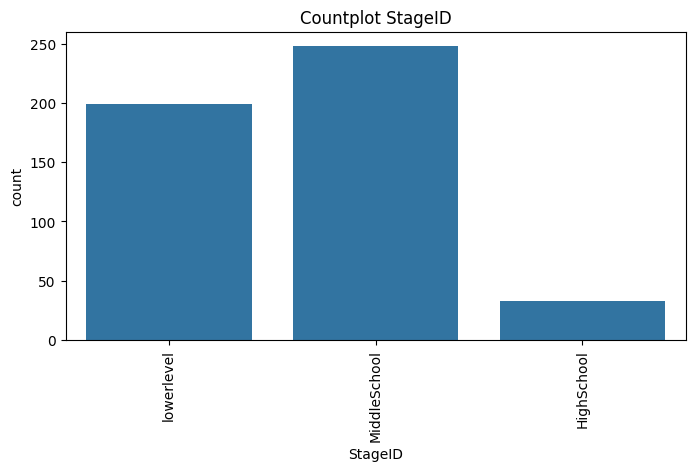

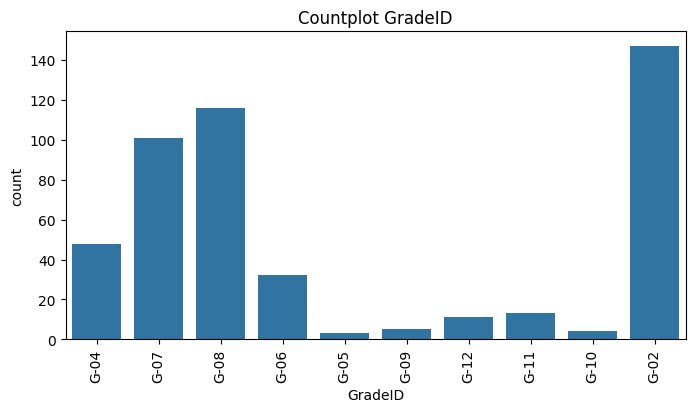

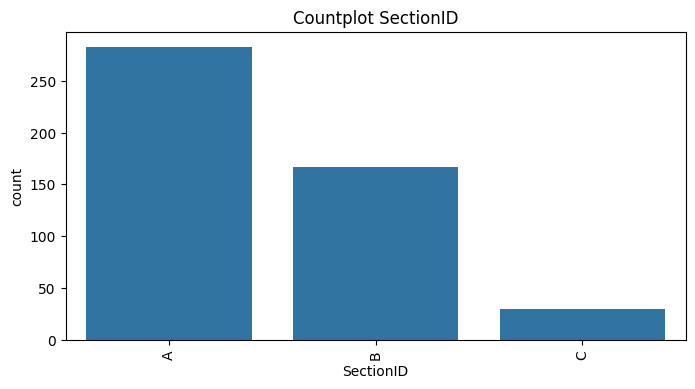

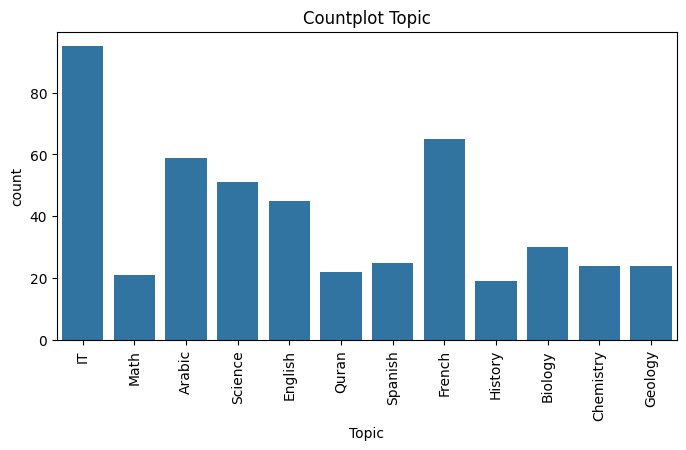

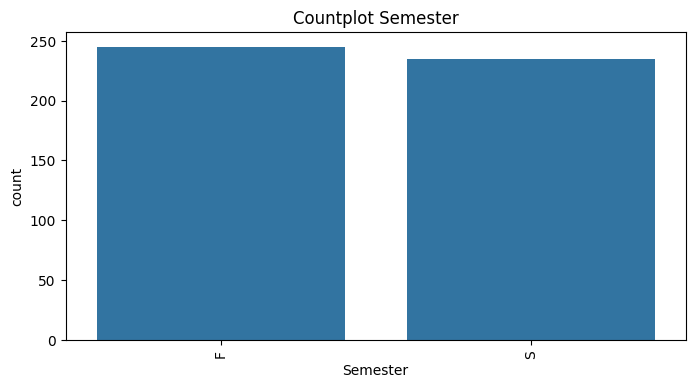

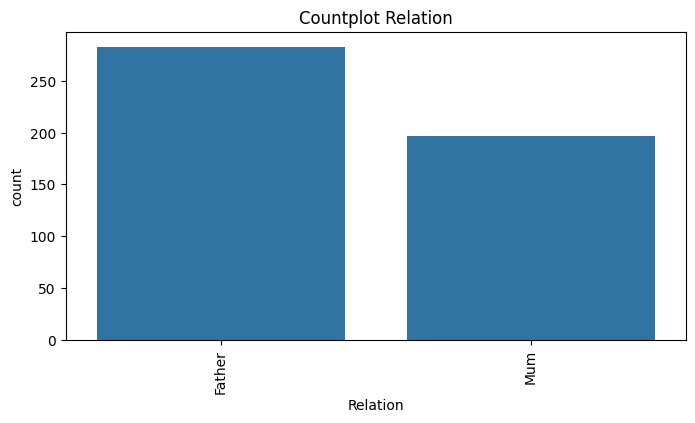

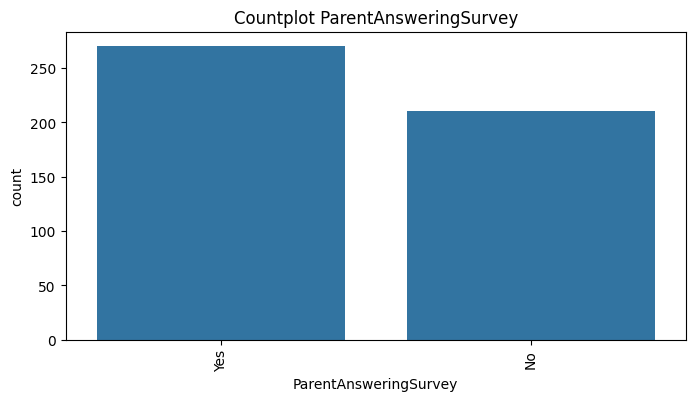

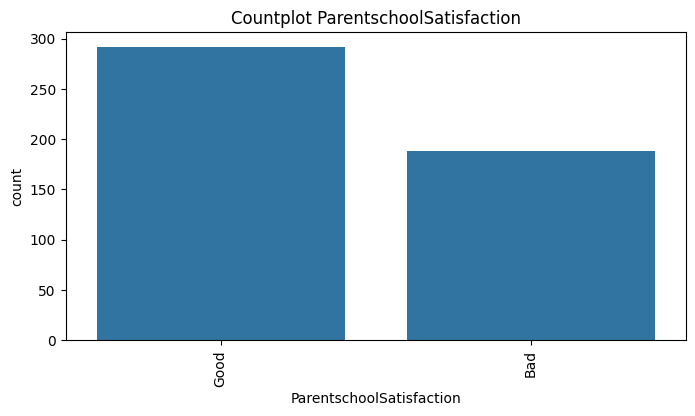

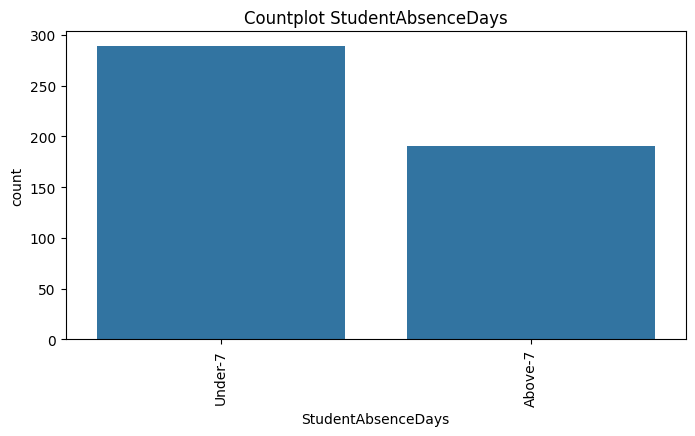

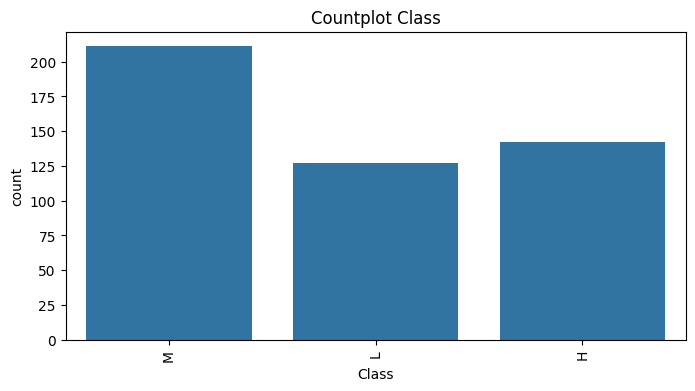

In [9]:
import seaborn as sns

# Mendapatkan kolom kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns

# Visualisasi countplot untuk setiap kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot {col}')
    plt.xticks(rotation=90)  # Jika ada label yang panjang
    plt.show()

#Preprocessing#


##Penanganan Missing Values##

In [10]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [11]:
data.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

##Penanganan Data Duplicate##

In [12]:
# Menghapus duplikat berdasarkan semua kolom
data = data.drop_duplicates()

In [13]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


##Encoding##

In [14]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

columns_to_label_encode = [
    'gender', 'StageID', 'SectionID', 'Semester', 'Relation',
    'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class',
    'Topic', 'GradeID', 'PlaceofBirth', 'NationalITy'
]

# Melakukan encoding pada setiap kolom yang ingin diencode
for column in columns_to_label_encode:
    data[column] = label_encoder.fit_transform(data[column])

C:\Users\Acer\AppData\Local\Temp\ipykernel_11992\1706041835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
C:\Users\Acer\AppData\Local\Temp\ipykernel_11992\1706041835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
C:\Users\Acer\AppData\Local\Temp\ipykernel_11992\1706041835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [15]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    478 non-null    int64
 1   NationalITy               478 non-null    int64
 2   PlaceofBirth              478 non-null    int64
 3   StageID                   478 non-null    int64
 4   GradeID                   478 non-null    int64
 5   SectionID                 478 non-null    int64
 6   Topic                     478 non-null    int64
 7   Semester                  478 non-null    int64
 8   Relation                  478 non-null    int64
 9   raisedhands               478 non-null    int64
 10  VisITedResources          478 non-null    int64
 11  AnnouncementsView         478 non-null    int64
 12  Discussion                478 non-null    int64
 13  ParentAnsweringSurvey     478 non-null    int64
 14  ParentschoolSatisfaction  478 non-null    int64

##Normalisasi Data##

In [17]:
X = data.drop(columns=['Class']) # Menghapus kolom Class untuk fitur
X

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0


In [18]:
y = data["Class"]# Kolom Performance sebagai target
y

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 478, dtype: int64

In [19]:
print(f"Ukuran X: {X.shape}")
print(f"Ukuran y: {y.shape}")

Ukuran X: (478, 16)
Ukuran y: (478,)


In [20]:
# Contoh X hasil normalisasi
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Misalkan X adalah DataFrame asli
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Tetap gunakan nama kolom asli
X_scaled

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.15,0.161616,0.020408,0.193878,1.0,1.0,1.0
1,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.20,0.202020,0.030612,0.244898,1.0,1.0,1.0
2,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.10,0.070707,0.000000,0.295918,0.0,0.0,0.0
3,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.30,0.252525,0.051020,0.346939,0.0,0.0,0.0
4,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.40,0.505051,0.122449,0.500000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.181818,1.0,0.0,0.05,0.040404,0.051020,0.071429,0.0,0.0,0.0
474,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.454545,0.0,0.0,0.50,0.777778,0.142857,0.275510,0.0,0.0,1.0
475,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.454545,1.0,0.0,0.55,0.747475,0.255102,0.285714,0.0,0.0,1.0
476,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.545455,0.0,0.0,0.30,0.171717,0.142857,0.571429,0.0,0.0,0.0


In [21]:
# Gabungkan X yang sudah dinormalisasi dengan y
data_combined = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

In [22]:
data_combined

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.15,0.161616,0.020408,0.193878,1.0,1.0,1.0,2
1,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.20,0.202020,0.030612,0.244898,1.0,1.0,1.0,2
2,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.10,0.070707,0.000000,0.295918,0.0,0.0,0.0,1
3,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.30,0.252525,0.051020,0.346939,0.0,0.0,0.0,1
4,1.0,0.307692,0.307692,1.0,0.111111,0.0,0.636364,0.0,0.0,0.40,0.505051,0.122449,0.500000,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.181818,1.0,0.0,0.05,0.040404,0.051020,0.071429,0.0,0.0,0.0,1
474,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.454545,0.0,0.0,0.50,0.777778,0.142857,0.275510,0.0,0.0,1.0,2
475,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.454545,1.0,0.0,0.55,0.747475,0.255102,0.285714,0.0,0.0,1.0,2
476,0.0,0.230769,0.230769,0.5,0.555556,0.0,0.545455,0.0,0.0,0.30,0.171717,0.142857,0.571429,0.0,0.0,0.0,1


##Balancing Data##

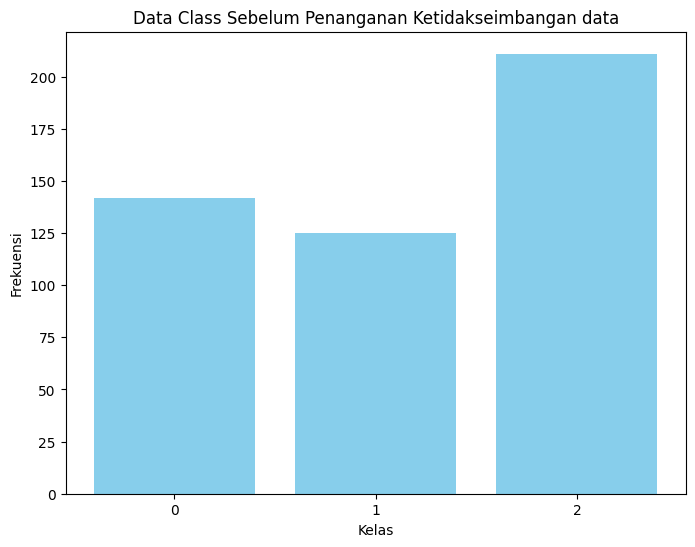

In [23]:
import matplotlib.pyplot as plt

# Hitung frekuensi masing-masing kelas dalam data y
unique_classes, class_counts = np.unique(y, return_counts=True)

# Buat bar chart dari frekuensi kelas
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.title('Data Class Sebelum Penanganan Ketidakseimbangan data')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.xticks(unique_classes)  # Mengatur label sumbu x sesuai dengan kelas unik
plt.show()

In [24]:
from imblearn.over_sampling import RandomOverSampler

# 3. Terapkan Random Over-Sampling
ros = RandomOverSampler(random_state=42)

# Melakukan resampling
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_scaled, y)

# Periksa ukuran setelah resampling
print(f"Ukuran X_resampled: {X_resampled_ros.shape}")
print(f"Ukuran y_resampled: {y_resampled_ros.shape}")

Ukuran X_resampled: (633, 16)
Ukuran y_resampled: (633,)


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


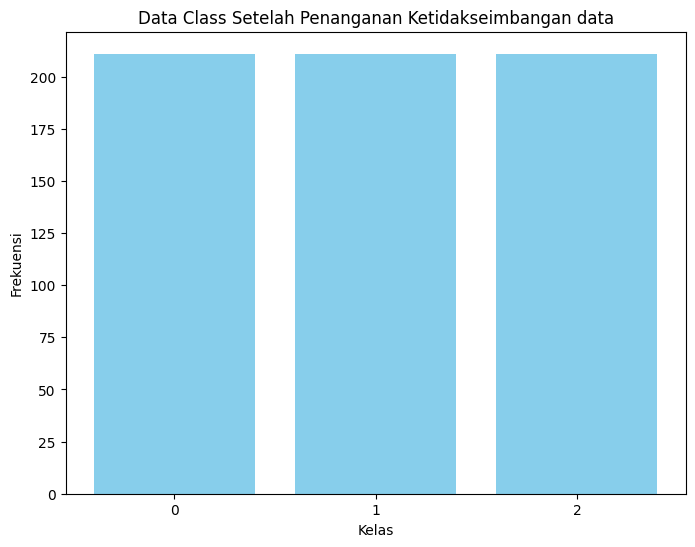

In [25]:
import matplotlib.pyplot as plt

# Hitung frekuensi masing-masing kelas dalam data y
unique_classes_resampled, class_counts_resampled = np.unique(y_resampled_ros, return_counts=True)

# Buat bar chart dari frekuensi kelas
plt.figure(figsize=(8, 6))
plt.bar(unique_classes_resampled, class_counts_resampled, color='skyblue')
plt.title('Data Class Setelah Penanganan Ketidakseimbangan data')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.xticks(unique_classes_resampled)  # Mengatur label sumbu x sesuai dengan kelas unik
plt.show()

In [26]:
# Periksa statistik dasar (mean, min, max, std)
print("Statistik Deskriptif X_resampled:")
stat_summary_X = X_resampled_ros.describe().T  # Statistik dasar
stat_summary_X["skewness"] = X_resampled_ros.apply(skew)  # Menambahkan skewness
stat_summary_X["kurtosis"] = X_resampled_ros.apply(kurtosis)  # Menambahkan kurtosis

print(stat_summary_X)

# Periksa distribusi target setelah resampling
print("\nDistribusi Label y_resampled:")
print(pd.Series(y_resampled_ros).value_counts())  # Cek distribusi kelas target

# Periksa statistik deskriptif Y (jika numerik)
if np.issubdtype(y_resampled_ros.dtype, np.number):
    print("\nStatistik Deskriptif y_resampled:")
    print(pd.Series(y_resampled_ros).describe())
    print(f"Skewness: {skew(y_resampled_ros)}")
    print(f"Kurtosis: {kurtosis(y_resampled_ros)}")

Statistik Deskriptif X_resampled:
                          count      mean       std  min       25%       50%  \
gender                    633.0  0.630332  0.483097  0.0  0.000000  1.000000   
NationalITy               633.0  0.334913  0.188986  0.0  0.230769  0.307692   
PlaceofBirth              633.0  0.336493  0.197597  0.0  0.230769  0.307692   
StageID                   633.0  0.684044  0.303745  0.0  0.500000  0.500000   
GradeID                   633.0  0.315956  0.277550  0.0  0.000000  0.444444   
SectionID                 633.0  0.234597  0.302710  0.0  0.000000  0.000000   
Topic                     633.0  0.482407  0.312972  0.0  0.272727  0.545455   
Semester                  633.0  0.481833  0.500065  0.0  0.000000  0.000000   
Relation                  633.0  0.423381  0.494485  0.0  0.000000  0.000000   
raisedhands               633.0  0.450411  0.310246  0.0  0.140000  0.450000   
VisITedResources          633.0  0.533391  0.340810  0.0  0.151515  0.626263   
Announ

#Splitting Data#

##Train Test Split##

In [27]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled_ros, y_resampled_ros, test_size=0.1, random_state=42)

# Menampilkan ukuran dataset
print("Ukuran dataset:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Ukuran dataset:
X_train: (569, 16), y_train: (569,)
X_test: (64, 16), y_test: (64,)


#Modelling#

In [28]:
# Import library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.base import BaseEstimator

In [29]:
# Tentukan jumlah fold
k = 25
# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

##Ensemble##

###Random Forest###

In [40]:
# Inisialisasi RandomForestClassifier
rf_model = RandomForestClassifier()

# Melakukan cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Menampilkan akurasi tiap fold
for i, score in enumerate(cv_scores_rf, start=1):
    print(f"Akurasi pada fold ke-{i}: {score:.4f}")

# Menampilkan akurasi rata-rata dan akurasi terbaik
lowest_accuracy = np.min(cv_scores_rf)
average_accuracy = np.mean(cv_scores_rf)
best_accuracy = np.max(cv_scores_rf)

print("Akurasi Rata-rata dari K-Fold Cross Validation: {:.4f}".format(average_accuracy))
print("Akurasi Terendah dari K-Fold Cross Validation: {:.4f}".format(lowest_accuracy))
print("Akurasi Terbaik dari K-Fold Cross Validation: {:.4f}".format(best_accuracy))

# Melatih model dengan data latih penuh
rf_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_rf = rf_model.predict(X_test)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Prediksi probabilitas untuk data uji
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Hitung AUC untuk multi-class classification
auc_rf = roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovo')  # Bisa juga 'ovr'
print(f"\nAUC (Multi-Class Classification): {auc_rf:.4f}")

# Menampilkan parameter yang digunakan dalam model Random Forest
print("\nParameter dalam model Random Forest:")
print(rf_model.get_params())

Akurasi pada fold ke-1: 0.9130
Akurasi pada fold ke-2: 0.8696
Akurasi pada fold ke-3: 0.9130
Akurasi pada fold ke-4: 0.7826
Akurasi pada fold ke-5: 0.8261
Akurasi pada fold ke-6: 0.8696
Akurasi pada fold ke-7: 0.9565
Akurasi pada fold ke-8: 0.8261
Akurasi pada fold ke-9: 0.8696
Akurasi pada fold ke-10: 0.8261
Akurasi pada fold ke-11: 0.8696
Akurasi pada fold ke-12: 0.8696
Akurasi pada fold ke-13: 0.7391
Akurasi pada fold ke-14: 0.8696
Akurasi pada fold ke-15: 0.9565
Akurasi pada fold ke-16: 0.7826
Akurasi pada fold ke-17: 0.9130
Akurasi pada fold ke-18: 0.8696
Akurasi pada fold ke-19: 0.8696
Akurasi pada fold ke-20: 0.8636
Akurasi pada fold ke-21: 0.9091
Akurasi pada fold ke-22: 0.8636
Akurasi pada fold ke-23: 0.9545
Akurasi pada fold ke-24: 0.8182
Akurasi pada fold ke-25: 0.8182
Akurasi Rata-rata dari K-Fold Cross Validation: 0.8647
Akurasi Terendah dari K-Fold Cross Validation: 0.7391
Akurasi Terbaik dari K-Fold Cross Validation: 0.9565

Classification Report:
              precision

### Extreme Gradient Boost###

In [31]:
class CustomXGBClassifier(BaseEstimator):
    def __init__(self, **params):
        self.model = xgb.XGBClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

# Inisialisasi XGBoost Classifier
xgb_model = CustomXGBClassifier()

#Melakukan cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='accuracy')

# Menampilkan akurasi tiap fold
for i, score in enumerate(cv_scores_xgb, start=1):
    print(f"Akurasi pada fold ke-{i}: {score:.4f}")

# Menampilkan akurasi rata-rata dan akurasi terbaik
lowest_accuracy = np.min(cv_scores_xgb)
average_accuracy = np.mean(cv_scores_xgb)
best_accuracy = np.max(cv_scores_xgb)

print("Akurasi Rata-rata dari K-Fold Cross Validation: {:.4f}".format(average_accuracy))
print("Akurasi Terendah dari K-Fold Cross Validation: {:.4f}".format(lowest_accuracy))
print("Akurasi Terbaik dari K-Fold Cross Validation: {:.4f}".format(best_accuracy))

# Melatih model dengan data latih penuh
xgb_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_xgb = xgb_model.predict(X_test)

# Prediksi probabilitas untuk data uji
y_pred_prob_xgb = xgb_model.predict_proba(X_test)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Hitung AUC untuk multi-class classification
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb, multi_class='ovo')  # Bisa juga 'ovr'
print(f"\nAUC (Multi-Class Classification): {auc_xgb:.4f}")

# Menampilkan parameter yang digunakan dalam model XGBoost
print("\nParameter dalam model XGBoost:")
print(xgb_model.get_params())

Akurasi pada fold ke-1: 0.9130
Akurasi pada fold ke-2: 0.8696
Akurasi pada fold ke-3: 0.8696
Akurasi pada fold ke-4: 0.8696
Akurasi pada fold ke-5: 0.8696
Akurasi pada fold ke-6: 0.8696
Akurasi pada fold ke-7: 0.9565
Akurasi pada fold ke-8: 0.8696
Akurasi pada fold ke-9: 0.8261
Akurasi pada fold ke-10: 0.7826
Akurasi pada fold ke-11: 0.8696
Akurasi pada fold ke-12: 0.8696
Akurasi pada fold ke-13: 0.7826
Akurasi pada fold ke-14: 0.7826
Akurasi pada fold ke-15: 0.9565
Akurasi pada fold ke-16: 0.7391
Akurasi pada fold ke-17: 0.9565
Akurasi pada fold ke-18: 0.8696
Akurasi pada fold ke-19: 0.9130
Akurasi pada fold ke-20: 0.8636
Akurasi pada fold ke-21: 0.8636
Akurasi pada fold ke-22: 0.9545
Akurasi pada fold ke-23: 0.7727
Akurasi pada fold ke-24: 0.7727
Akurasi pada fold ke-25: 0.8182
Akurasi Rata-rata dari K-Fold Cross Validation: 0.8592
Akurasi Terendah dari K-Fold Cross Validation: 0.7391
Akurasi Terbaik dari K-Fold Cross Validation: 0.9565

Classification Report:
              precision

##Non Ensemble##

###Logistic Regression###

In [32]:
# Inisialisasi Logistic Regression
logreg_model = LogisticRegression()

# Melakukan cross-validation
cv_scores_lr = cross_val_score(logreg_model, X_train, y_train, cv=kf, scoring='accuracy')

# Menampilkan akurasi tiap fold
for i, score in enumerate(cv_scores_lr, start=1):
    print(f"Akurasi pada fold ke-{i}: {score:.4f}")

# Menampilkan akurasi rata-rata dan akurasi terbaik
lowest_accuracy = np.min(cv_scores_lr)
average_accuracy = np.mean(cv_scores_lr)
best_accuracy = np.max(cv_scores_lr)

print("Akurasi Rata-rata dari K-Fold Cross Validation: {:.4f}".format(average_accuracy))
print("Akurasi Terendah dari K-Fold Cross Validation: {:.4f}".format(lowest_accuracy))
print("Akurasi Terbaik dari K-Fold Cross Validation: {:.4f}".format(best_accuracy))

# Melatih model dengan data latih penuh
logreg_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_lr = logreg_model.predict(X_test)

# Prediksi probabilitas untuk data uji
y_pred_prob_lr = logreg_model.predict_proba(X_test)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Hitung AUC untuk multi-class classification
auc_lr = roc_auc_score(y_test, y_pred_prob_lr, multi_class='ovo')  # Bisa juga 'ovr'
print(f"\nAUC (Multi-Class Classification): {auc_lr:.4f}")

# Menampilkan parameter yang digunakan dalam model Logistic Regression
print("\nParameter dalam model Logistic Regression:")
print(logreg_model.get_params())

Akurasi pada fold ke-1: 0.6522
Akurasi pada fold ke-2: 0.7826
Akurasi pada fold ke-3: 0.8261
Akurasi pada fold ke-4: 0.6957
Akurasi pada fold ke-5: 0.7391
Akurasi pada fold ke-6: 0.7826
Akurasi pada fold ke-7: 0.8261
Akurasi pada fold ke-8: 0.6957
Akurasi pada fold ke-9: 0.8261
Akurasi pada fold ke-10: 0.7826
Akurasi pada fold ke-11: 0.7826
Akurasi pada fold ke-12: 0.7391
Akurasi pada fold ke-13: 0.6087
Akurasi pada fold ke-14: 0.7391
Akurasi pada fold ke-15: 0.6957
Akurasi pada fold ke-16: 0.8261
Akurasi pada fold ke-17: 0.8696
Akurasi pada fold ke-18: 0.9130
Akurasi pada fold ke-19: 0.7826
Akurasi pada fold ke-20: 0.7727
Akurasi pada fold ke-21: 0.8182
Akurasi pada fold ke-22: 0.7727
Akurasi pada fold ke-23: 0.7273
Akurasi pada fold ke-24: 0.8182
Akurasi pada fold ke-25: 0.7727
Akurasi Rata-rata dari K-Fold Cross Validation: 0.7699
Akurasi Terendah dari K-Fold Cross Validation: 0.6087
Akurasi Terbaik dari K-Fold Cross Validation: 0.9130

Classification Report:
              precision

###Decision Tree###

In [33]:
# Inisialisasi Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Melakukan cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='accuracy')

# Menampilkan akurasi tiap fold
for i, score in enumerate(cv_scores_dt, start=1):
    print(f"Akurasi pada fold ke-{i}: {score:.4f}")

# Menampilkan akurasi rata-rata dan akurasi terbaik
lowest_accuracy = np.min(cv_scores_dt)
average_accuracy = np.mean(cv_scores_dt)
best_accuracy = np.max(cv_scores_dt)

print("Akurasi Rata-rata dari K-Fold Cross Validation: {:.4f}".format(average_accuracy))
print("Akurasi Terendah dari K-Fold Cross Validation: {:.4f}".format(lowest_accuracy))
print("Akurasi Terbaik dari K-Fold Cross Validation: {:.4f}".format(best_accuracy))

# Melatih model dengan data latih penuh
dt_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_dt = dt_model.predict(X_test)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Prediksi probabilitas untuk data uji
y_pred_prob_dt = dt_model.predict_proba(X_test)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Hitung AUC untuk multi-class classification
auc_dt = roc_auc_score(y_test, y_pred_prob_dt, multi_class='ovo')  # Bisa juga 'ovr'
print(f"\nAUC (Multi-Class Classification): {auc_dt:.4f}")

# Menampilkan parameter yang digunakan dalam model Decision Tree
print("\nParameter dalam model Decision Tree:")
print(dt_model.get_params())

Akurasi pada fold ke-1: 0.8696
Akurasi pada fold ke-2: 0.8261
Akurasi pada fold ke-3: 0.9130
Akurasi pada fold ke-4: 0.7826
Akurasi pada fold ke-5: 0.8261
Akurasi pada fold ke-6: 0.8261
Akurasi pada fold ke-7: 0.9130
Akurasi pada fold ke-8: 0.8261
Akurasi pada fold ke-9: 0.8696
Akurasi pada fold ke-10: 0.7826
Akurasi pada fold ke-11: 0.8261
Akurasi pada fold ke-12: 0.7826
Akurasi pada fold ke-13: 0.7826
Akurasi pada fold ke-14: 0.7826
Akurasi pada fold ke-15: 0.8696
Akurasi pada fold ke-16: 0.8261
Akurasi pada fold ke-17: 0.9130
Akurasi pada fold ke-18: 0.7826
Akurasi pada fold ke-19: 0.8696
Akurasi pada fold ke-20: 0.8182
Akurasi pada fold ke-21: 0.7727
Akurasi pada fold ke-22: 0.8636
Akurasi pada fold ke-23: 0.9091
Akurasi pada fold ke-24: 0.8182
Akurasi pada fold ke-25: 0.5909
Akurasi Rata-rata dari K-Fold Cross Validation: 0.8257
Akurasi Terendah dari K-Fold Cross Validation: 0.5909
Akurasi Terbaik dari K-Fold Cross Validation: 0.9130

Classification Report:
              precision

#Evaluasi#

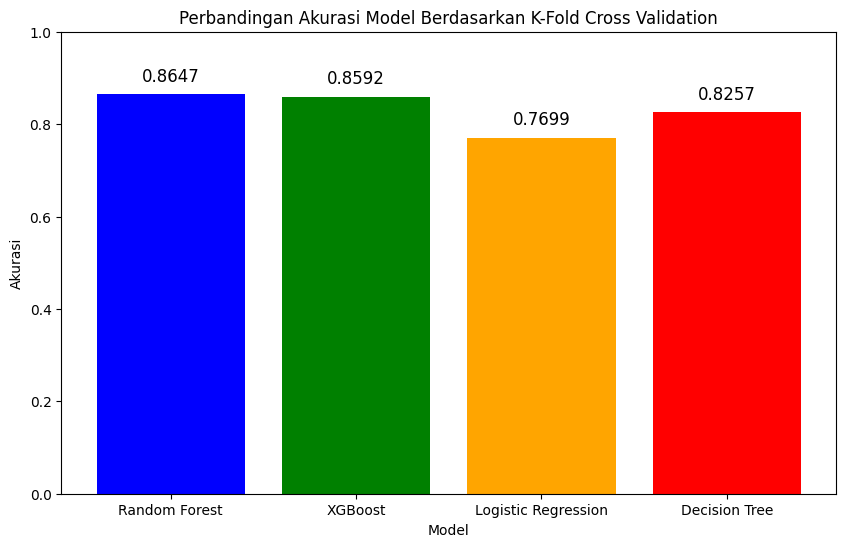

In [34]:
import matplotlib.pyplot as plt

# Menghitung akurasi rata-rata untuk setiap model
average_accuracy_rf = np.mean(cv_scores_rf)
average_accuracy_xgb = np.mean(cv_scores_xgb)
average_accuracy_lr = np.mean(cv_scores_lr)
average_accuracy_dt = np.mean(cv_scores_dt)

# Daftar nama model
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree']

# Daftar akurasi untuk setiap model
accuracies = [average_accuracy_rf, average_accuracy_xgb, average_accuracy_lr, average_accuracy_dt]

# Membuat histogram
plt.figure(figsize=(10, 6))  # Menentukan ukuran gambar
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])  # Membuat batang dengan warna berbeda untuk setiap model

# Menambahkan angka akurasi di atas setiap batang
for bar in bars:
    yval = bar.get_height()  # Mendapatkan tinggi batang (akurasi)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom', fontsize=12)  # Menambahkan teks angka

plt.xlabel('Model')  # Label sumbu X
plt.ylabel('Akurasi')  # Label sumbu Y
plt.title('Perbandingan Akurasi Model Berdasarkan K-Fold Cross Validation')  # Judul grafik
plt.ylim(0, 1)  # Menentukan batasan akurasi dari 0 sampai 1
plt.show()  # Menampilkan grafik



Confusion Matrix:


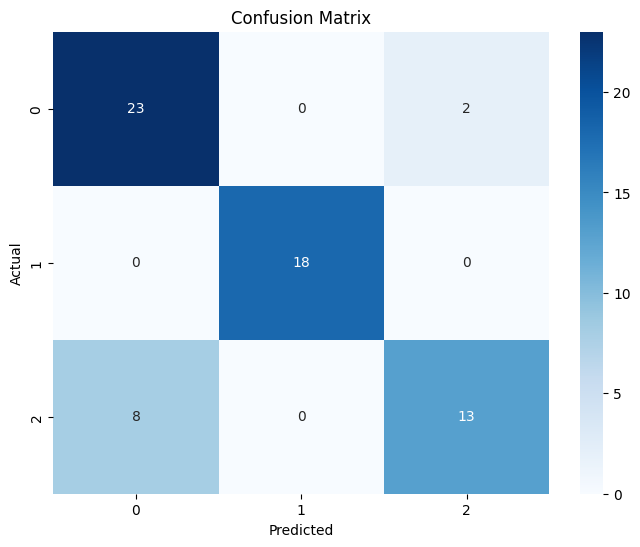

In [35]:
import seaborn as sns

# Menampilkan confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:


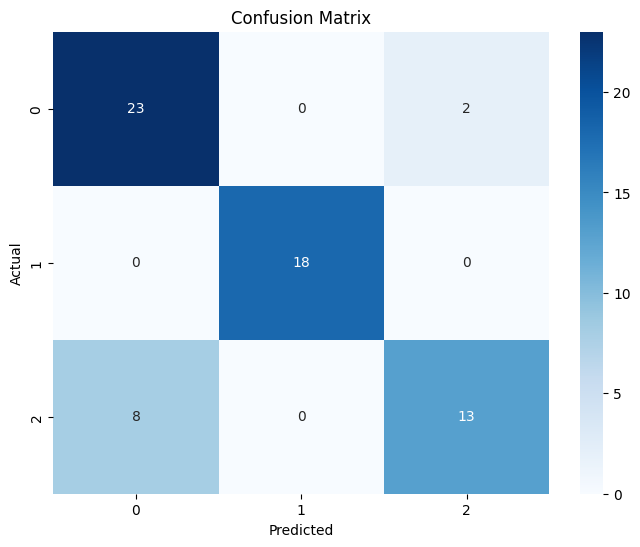

In [36]:
# Menampilkan confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:


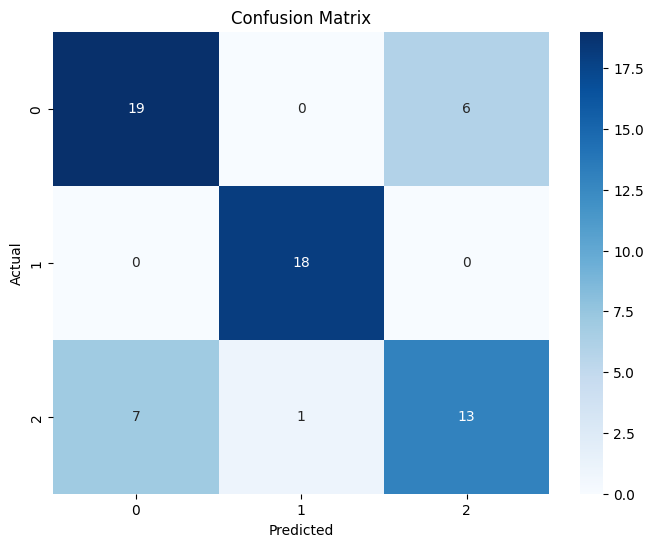

In [37]:
# Menampilkan confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:


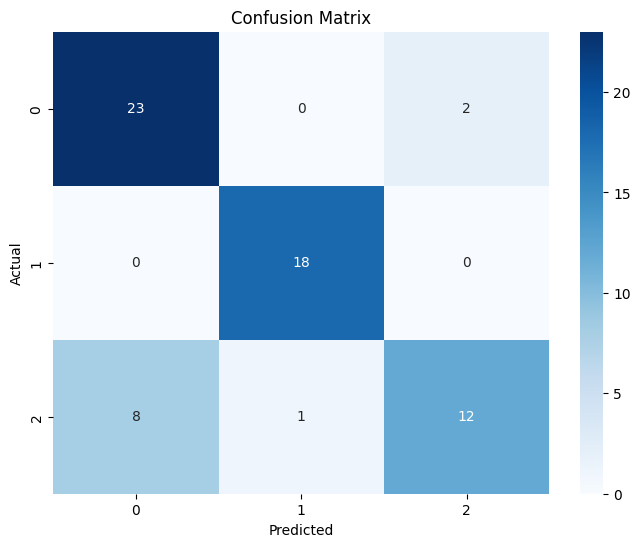

In [38]:
# Menampilkan confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()